##### Cambios:

-Ahora el plan se puede personalizar por estudiante

-Error al calcular la amplitud de horario, retornaba costos mayores

-Error al calcular el costo por disponibilidad de horario, solo contemplaba los días lunes, martes y miércoles al calcular su disponibilidad total y aparte hacía mal el calculo.

In [1]:
import pandas as pd
import numpy as np
import pygad as pg
import time
import requests
import matplotlib.pyplot as plt

# Limpieza y preparación de los datos

## Lectura de datos

In [2]:
d16 = pd.read_csv('./datos/datos_2016.csv')
d17 = pd.read_csv('./datos/datos_2017.csv')
d18 = pd.read_csv('./datos/datos_2018.csv')
d19 = pd.read_csv('./datos/datos_2019.csv')
d2021 = pd.read_csv('./datos/2020_2021.csv')

In [3]:
asignaturas = pd.read_csv('asignaturas2.csv',encoding = 'ISO-8859-1')

In [4]:
plan_2016 = asignaturas.query('plan == "IDP2016"')
plan_2021 = asignaturas.query('plan == "IDP2021"')

In [5]:
oferta = pd.read_csv('oferta_ideio.csv',encoding = 'ISO-8859-1')

In [6]:
seriaciones = pd.read_csv('seriacion.csv')

## Visualización de datos

In [7]:
d16.head()

,Unnamed: 0,carrera,periodo,clave,asignatura,promediofinal,docente,ceveval_global,ceneval_analitico,ceneval_matematico,...,r_modulo8,modulo9,r_modulo9,modulo10,r_modulo10,modulo11,r_modulo11,modulo12,r_modulo12,n_matricula
0,0,Negocios Internacionales,201601,DP0295,Taller de formación en responsabilidad social ...,10.0,Maldonado Saldaña / Gisela,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
1,1,Negocios Internacionales,201601,NI0215,Taller de software para negocios internacionales,9.0,Villeda Cuellar / Víctor Hugo,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
2,2,Negocios Internacionales,201601,LI1104,Nivel 4 Inglés,10.0,Ross / Andrew Patrick Simon,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
3,3,Negocios Internacionales,201601,NI0209,Administración financiera,6.0,Vallejo Filoteo / Jorge,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
4,4,Negocios Internacionales,201601,NI0213,Transporte y logística en comercio exterior,9.0,Cañedo Magaña / Magdalena del Carmen,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285


In [8]:
d2021.head()

,Unnamed: 0,Column1,programa,periodo,clave,asignatura,docente,promediofinal,ceveval_global,hrs_trabaja,n_matricula
0,0,1,Ingeniería en Datos e Inteligencia Organizacional,202001,IL0414,Taller de argumentación y técnicas de negociación,Torres Pérez / Rubén Juan,7.0,952.0,De 5 a 10 horas,170311163
1,1,2,Ingeniería en Datos e Inteligencia Organizacional,202001,II0422,Taller de emprendedores,Zapata Solís / Zuemy De Lourdes,8.0,1048.0,No trabajaba,180311454
2,2,3,Ingeniería en Datos e Inteligencia Organizacional,202001,DP0498,Problemas de México,Díaz Molina / Libertad Fidelina,9.0,1144.0,De 5 a 10 horas,170311232
3,3,4,Ingeniería en Datos e Inteligencia Organizacional,202001,IT0264,Introducción a los sistemas de información,Olivares González / Oscar,10.0,1072.0,De 11 a 15 horas,190311813
4,4,5,Ingeniería en Datos e Inteligencia Organizacional,202001,II0215,Electricidad y magnetismo,Ramírez Carmona / Leslye Johanna,7.0,1018.0,Más de 20 horas,180311416


In [9]:
asignaturas.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
0,1,II0106,Cálculo diferencial,8,Basica,IAP2019,NaN
1,1,II0209,Cálculo integral,6,Basica,IAP2019,NaN
2,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IAP2019,NaN
3,1,IA0106,Ecología,6,Basica,IAP2019,NaN
4,1,II0102,Física experimental,8,Basica,IAP2019,NaN


In [10]:
plan_2016.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
603,1,IT0101,Algoritmos y estructura de datos,6,Basica,IDP2016,NaN
604,1,II0106,Cálculo diferencial,8,Basica,IDP2016,NaN
605,1,II0209,Cálculo integral,6,Basica,IDP2016,NaN
606,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IDP2016,NaN
607,1,ID0101,Diseño de patrones para datos estructurados,6,Basica,IDP2016,NaN


In [11]:
oferta.head()

,ciclo,Trayectoria,Tipo,clave,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
0,1,0,BAS,DP0193,Taller de redacción profesional,Alvarado Martínez / María Del Carmen,-,-,17:00-18:00,-,16:00-18:00,-
1,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,-,-,-,15:00-17:00,17:00-18:00,-
2,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,18:00-20:00,-,-,17:00-18:00,-,-
3,1,0,BAS,DP0193,Taller de redacción profesional,Parra Dorantes / Roberto,-,-,18:00-20:00,-,17:00-18:00,-
4,1,0,BAS,DP0194,Desarrollo de habilidades del pensamiento,Mendoza Luna / José Arturo,-,-,19:00-20:00,-,20:00-22:00,-


In [12]:
seriaciones.head()

,plan,ser1,ser2
0,IDP2016,II0106,II0209
1,IDP2016,ID0102,II0215
2,IDP2016,II0209,II0320
3,IDP2016,ID0103,IT0263
4,IDP2016,IT0264,ID0204


## Limpieza de datos

In [13]:
cargas16_19 = pd.concat([d16,d17,d18,d19])
cargas20_21 = d2021

In [14]:
cargas16_19 = cargas16_19.query('carrera == "Ingeniería en Datos e Inteligencia Organizacional"')

In [15]:
cargas16_19 = cargas16_19[['Unnamed: 0', 'carrera', 'periodo', 'clave', 'asignatura',
       'promediofinal', 'docente', 'ceveval_global', 'ceneval_analitico',
       'ceneval_matematico', 'ceneval_lengua', 'ceneval_esp',
       'n_matricula']]

In [16]:
matriculas16 = cargas16_19.query('n_matricula > 160000000 and n_matricula < 170000000')['n_matricula'].unique()
matriculas17 = cargas16_19.query('n_matricula > 170000000 and n_matricula < 180000000')['n_matricula'].unique()
matriculas18 = cargas16_19.query('n_matricula > 180000000 and n_matricula < 190000000')['n_matricula'].unique()
matriculas19 = cargas16_19.query('n_matricula > 190000000 and n_matricula < 200000000')['n_matricula'].unique()
matriculas20 = cargas20_21.query('n_matricula > 200000000 and n_matricula < 210000000')['n_matricula'].unique()
matriculas21 = cargas20_21.query('n_matricula > 210000000 and n_matricula < 220000000')['n_matricula'].unique()

In [17]:
matriculas = np.concatenate((matriculas16, matriculas17,matriculas18,matriculas19,matriculas20,matriculas21))

In [18]:
cargas20_21 = cargas20_21.rename(columns={'programa': 'carrera'})

In [19]:
formato_cargas20_21 = cargas20_21[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]
formato_cargas16_19 = cargas16_19[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]

formato_cargas = pd.concat([formato_cargas16_19,formato_cargas20_21])

In [20]:
oferta = oferta[['clave','Nombre', 'Maestro', 'Lunes','Martes', 'Miercoles', 'Jueves', 'Viernes']]

In [21]:
oferta = oferta.drop_duplicates()

In [22]:
oferta['Lunes'].unique()

array(['-', '18:00-20:00', '17:00-19:00', '20:00-22:00', '15:00-17:00',
       '9:00-11:00', '19:00-21:00', '19:00-20:00', '7:00-9:00',
       '11:00-13:00', '13:00-14:00', '16:00-18:00', '14:00-16:00',
       '7:00-10:00', '7:00-8:00', '16:00-19:00', '21:00-22:00',
       '16:00-17:00'], dtype=object)

In [23]:
oferta['Martes'].unique()

array(['-', '15:00-17:00', '20:00-21:00', '20:00-22:00', '19:00-20:00',
       '16:00-18:00', '18:00-19:00', '7:00-9:00', '9:00-11:00',
       '18:00-20:00', '14:00-16:00', '13:00-15:00', '8:00-9:00'],
      dtype=object)

In [24]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '\n13:00-15:00', '13:00-15:00', '17:00-19:00',
       '19:00-21:00', '15:00-16:00', '12:00-13:00', '8:00-10:00',
       '7:00-8:00', '10:00-12:00', '16:00-18:00', '14:00-15:00'],
      dtype=object)

In [25]:
oferta['Jueves'].unique()

array(['-', '15:00-17:00', '17:00-18:00', '20:00-21:00', '16:00-17:00',
       '9:00-10:00', '20:00-22:00', '18:00-20:00', '19:00-21:00',
       '7:00-8:00', '13:00-14:00', '8:00-9:00', '9:00-11:00',
       '16:00-18:00', '14:00-15:00', '13:00-15:00', '7:00-9:00',
       '15:00-16:00', '18:00-19:00', '19:00-20:00', '21:00-22:00'],
      dtype=object)

In [26]:
oferta['Viernes'].unique()

array(['16:00-18:00', '17:00-18:00', '-', '20:00-22:00', '15:00-17:00',
       '14:00-15:00', '18:00-20:00', '20:00-21:00', '13:00-14:00',
       '9:00-10:00', '7:00-9:00', '10:00-11:00', '16:00-17:00',
       '14:00-16:00', '18:00-19:00', '8:00-10:00', '19:00-20:00',
       '19:00-21:00'], dtype=object)

In [27]:
oferta.loc[36,'Miercoles'] = '13:00-15:00'

In [28]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '13:00-15:00', '17:00-19:00', '19:00-21:00',
       '15:00-16:00', '12:00-13:00', '8:00-10:00', '7:00-8:00',
       '10:00-12:00', '16:00-18:00', '14:00-15:00'], dtype=object)

In [29]:
def formatoHora(hora):
    if len(hora) == 11:
        return hora
    elif len(hora) == 10:
        return '0' + hora
    elif len(hora) == 9:
        return '0' + hora[0:5] + '0' + hora[5:]
    elif len(hora) == 1:
        return '-'

In [30]:
oferta['Lunes'] = oferta['Lunes'].apply(lambda horas: formatoHora(horas))
oferta['Martes'] = oferta['Martes'].apply(lambda horas: formatoHora(horas))
oferta['Miercoles'] = oferta['Miercoles'].apply(lambda horas: formatoHora(horas))
oferta['Jueves'] = oferta['Jueves'].apply(lambda horas: formatoHora(horas))
oferta['Viernes'] = oferta['Viernes'].apply(lambda horas: formatoHora(horas))

# Definición de funciones útiles

## Función para obtener un Kardex aleatorio

In [31]:
def obtenerKardex(mat = -1):
    if(mat == -1):
        mat = np.random.choice(matriculas)
    return formato_cargas.query('n_matricula == ' + str(mat)).sort_values('periodo')

In [32]:
def obtenerCreditos(kardex):
    claves = kardex.query('promediofinal >= 7')['clave'].unique()
    totalCreditos = 0
    for clave in claves:
        if(clave[0:2] == 'LI' or clave[0:2] == 'TA' or clave[0:2] == 'AD'):
            continue
        totalCreditos += plan.query('clave == "' + clave + '"')['creditos'].values[0]
    return totalCreditos

In [33]:
def obtenerRecomendacionesUnicas(ins,umbral):
    recomendaciones = ins.population[ins.last_generation_fitness >= umbral].copy()
    recomendacionesFinal = []
    for rec in recomendaciones:
        recomendacionesFinal.append(list(set(rec)))
    recomendacionesFinal = list(np.unique(recomendacionesFinal))
    recomendacionesFinal.sort(key=lambda x: -obtenerDesempeno(x,0))

    return recomendacionesFinal

In [34]:
def verKardex():
    print('Matricula: ' + str(kardex.iloc[0]['n_matricula']))
    print('Carrera: ' + str(kardex.iloc[0]['carrera']))
    print('Creditos: ' + str(obtenerCreditos(kardex))+ '\n') 
    periodos = kardex['periodo'].unique()
    for per in periodos:
        print('Periodo: ' + str(per))
        print('Clave\t\tPromedio\tNombre de asignatura')
        materias = kardex.query('periodo == ' + str(per))
        for i in range(len(materias)):
            if(materias.iloc[i]['promediofinal'] < 7):
                print('* ' + materias.iloc[i]['clave'] + '\t' + str(materias.iloc[i]['promediofinal']) + '\t\t' + materias.iloc[i]['asignatura'])
            else:
                print(materias.iloc[i]['clave'] + '\t\t' + str(materias.iloc[i]['promediofinal']) + '\t\t' + materias.iloc[i]['asignatura'])
        print('\n')
    

## Obtención de oferta útil

En este sección se crea la función "obtenerOfertaUtil" la cual filtra la oferta académica para eliminar las materias que no cumplen con la restricción de llevar materias aprobadas y la restricción de llevar materias que no respeten la seriación.

In [35]:
def materiaHaSidoAprobada(kardex,clave):
    if len(kardex.query('clave == "' + clave + '" and promediofinal >= 7')) == 0:
        return False
    else:
        return True

In [36]:
def respetaSeriacion(clave,kardex):
    if len(seriaciones.query('ser2 == "' + clave + '"')) == 0:
        return True
    else:
        #Se guarda en necesarias la lista de asignaturas necesarias para llevar la asignura "clave"
        necesarias = seriaciones.query('ser2 == "' + clave + '"')['ser1'].unique()
        
        #Se recorre la lista para comprobar si el estudiante ya pasó las asignaturas necesarias, en caso de que le falte 
        #al menos una, entonces no se respeta la seriación.
        for necesaria in necesarias:
            if not(materiaHaSidoAprobada(kardex,necesaria)):
                return False
        return True

In [37]:
#Filtra las materias que no cumplen las restricciones 1 y 2

def obtenerOfertaUtil(kardex,oferta):
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    
    #Se eliminan las materias en la oferta que ya han sido aprobadas
    aprobadas = kardex.query('promediofinal >= 7')['clave'].unique()
    for clave in aprobadas:
        oferta = oferta.query('clave != "' + clave + '"')
        
    #Se eliminan las materias que el alumno no puede llevar por la seriación
    ofertaUtilIndex = set(oferta.index.values)
    for idx in oferta.index:
        if not(respetaSeriacion(oferta.loc[idx]['clave'],kardex)):
            ofertaUtilIndex.remove(idx)
            
    #Se eliminan prácticas profesionales y proyecto terminal
    for i in range(len(oferta['clave'].values)):
        clave = oferta['clave'].values[i]
        if clave[0:3] == 'PID' or clave == 'IT0427':
            try:
                ofertaUtilIndex.remove(oferta.index.values[i])
            except:
                continue
    ofertaUtil = oferta.loc[list(ofertaUtilIndex)]
    
    ofertaUtil = pd.merge(ofertaUtil,plan,how='left',on='clave')[['clave','ciclos','Nombre','Maestro','Lunes','Martes','Miercoles','Jueves','Viernes']]
    
    #Se eliminan materias de elección libre de primer y segundo ciclo
    if(materiaHaSidoAprobada(kardex,'IL0102')):
        ofertaUtil = ofertaUtil.query('clave != "ID0160"')
    if(materiaHaSidoAprobada(kardex,'ID0160')):
        ofertaUtil = ofertaUtil.query('clave != "IL0102"')
    
    if(materiaHaSidoAprobada(kardex,'IT0103')):
        ofertaUtil = ofertaUtil.query('clave != "ID0161"')
    if(materiaHaSidoAprobada(kardex,'ID0161')):
        ofertaUtil = ofertaUtil.query('clave != "IT0103"')
        
    if(materiaHaSidoAprobada(kardex,'ID0264')):
        ofertaUtil = ofertaUtil.query('clave != "ID0262"')
    if(materiaHaSidoAprobada(kardex,'ID0262')):
        ofertaUtil = ofertaUtil.query('clave != "ID0264"')
        
    if(materiaHaSidoAprobada(kardex,'ID0263')):
        ofertaUtil = ofertaUtil.query('clave != "ID0265"')
    if(materiaHaSidoAprobada(kardex,'ID0265')):
        ofertaUtil = ofertaUtil.query('clave != "ID0263"')
        
    #Si la disponibilidad de horario es una restricción, entonces elimina las materias que violen la restricción
    if(disponibilidadComoRestriccion):
        indices = set(ofertaUtil.index)
        indicesUtiles = indices.copy()
        for dia in dias:
            for i in indices:
                if ofertaUtil.loc[i][dia] == '-':
                    continue
                
                horaInicio = int(ofertaUtil.loc[i][dia][0:2])
                horaFin = int(ofertaUtil.loc[i][dia][6:8])
                
                for hora in range(horaInicio,horaFin):
                    if not(disponibilidad.query('hora == ' + str(hora))[dia].values[0]):
                        if i in indicesUtiles:
                            indicesUtiles.remove(i)
        indicesUtiles = list(indicesUtiles)
        ofertaUtil = ofertaUtil.loc[indicesUtiles]
    
    return ofertaUtil

## Generación de carga aleatoria válida

En esta sección creamos las funciones "generarCargaValida" la cual retorna una string de bits representando una carga académica con base a la oferta útil. También se crea la función "obtenerDatosCarga" que nos ayuda a obtener los datos de una carga académica con base a la oferta útil y a una string de bits que denominamos "bits de carga"

In [38]:
def generarSolucionAleatoria(ofertaUtil):
    solucion = [-1] * 9
    for i in range(9):
        gen = np.random.randint(-1,len(ofertaUtil))
        if gen == -1:
            solucion[i] = -1
        else:
            solucion[i] = ofertaUtil.index[gen]
    return solucion

In [39]:
def obtenerDatosCarga(solucion,ofertaUtil):
    solucionU = np.array(solucion)
    solucionU = np.unique(solucionU)
    solucionU = solucionU[solucionU >= 0]
    
    return ofertaUtil.loc[solucionU]

In [40]:
def comprobarTraslapacion(solucion,ofertaUtil):
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    
    for dia in dias:
        horarioDia = datosCarga.sort_values(dia)[dia].values
        for i in range(len(horarioDia)):
            if horarioDia[i] == '-':
                continue
            horaInicioI = int(horarioDia[i][0:2])
            horaFinI = int(horarioDia[i][6:8])
            
            for j in range(i+1,len(horarioDia)):
                horaInicioJ = int(horarioDia[j][0:2])
                horaFinJ = int(horarioDia[j][6:8])
                
                if not(horaFinJ  <= horaInicioI or horaInicioJ >= horaFinI):
                    return True
    return False

In [41]:
def esValido(solucion,ofertaUtil):
    #Si se repite una materia es inválido
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    if len(datosCarga['clave'].unique()) < len(datosCarga):
        return False
    #Si se traslapan dos materias es inválido
    if comprobarTraslapacion(solucion,ofertaUtil):
        return False
    #Si son menos de 3 materias es inválido
    solucionSet = set(solucion)
    if -1 in solucionSet:
        solucionSet.remove(-1)
    if(len(solucionSet)<3):
        return False
    
    #Si se llevan dos materias de elección libre del ciclo 1 y 2
    clavesSet = set(datosCarga['clave'])
    
    if 'IL0102' in clavesSet and 'ID0160' in clavesSet:
        return False
    if 'IT0103' in clavesSet and 'ID0161' in clavesSet:
        return False
    if 'ID0264' in clavesSet and 'ID0262' in clavesSet:
        return False
    if 'ID0263' in clavesSet and 'ID0265' in clavesSet:
        return False
    
    return True

In [42]:
def generarSolucionValida(ofertaUtil):
    bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    while not(esValido(bitsDeCarga,ofertaUtil)):
        bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    return bitsDeCarga

In [43]:
def obtenerHorario(carga):
    primeraHoraMinima = 24
    ultimaHoraMaxima = 0
    datosCarga = obtenerDatosCarga(carga,ofertaUtil)
    horario = pd.DataFrame({
        'Hora': ['7:00-8:00','8:00-9:00','9:00-10:00','10:00-11:00','11:00-12:00','12:00-13:00','13:00-14:00','14:00-15:00','15:00-16:00','16:00-17:00','17:00-18:00','18:00-19:00','19:00-20:00','20:00-21:00','21:00-22:00'],
        'Lunes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Martes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Miercoles': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Jueves': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Viernes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
    })
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    for dia in dias:
        for i in range(len(datosCarga)):
            if datosCarga[dia].iloc[i] == '-':
                continue

            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            horaFin = int(datosCarga.iloc[i][dia][6:8])
            
            primeraHoraMinima = min(primeraHoraMinima,horaInicio)
            ultimaHoraMaxima = max(ultimaHoraMaxima,horaFin)
            
            nombre = datosCarga.iloc[i]['Nombre']

            for hora in range(horaInicio,horaFin):
                horario.loc[hora-7,dia]=nombre
    return horario[(primeraHoraMinima-7):(ultimaHoraMaxima-6)]

# Definición de funciones de utilidad y de costo

## Utilidad de carga académica con base en cantidad ideal de materias

In [44]:
def UpCM(solucion):
    if(cantidadMateriasIdeal == 0):
        return 1
    
    diferenciaMaxima = max(cantidadMateriasIdeal-3,9-cantidadMateriasIdeal)
    solucionSet = set(solucion)
    
    if -1 in solucionSet:
        solucionSet.remove(-1)
        
    tamanoCarga = len(solucionSet)
    separacion = abs(tamanoCarga-cantidadMateriasIdeal)
    
    return 1 - (separacion / diferenciaMaxima)

## Utilidad de carga académica con base en las materias reprobadas

In [80]:
def obtenerMateriasReprobadas(kardex):
    materiasReprobadas = kardex.query('promediofinal < 7')['clave'].unique()
    materiasReprobadasFinal = []
    for clave in materiasReprobadas:
        aprobado = len(kardex.query('clave == "' + clave + '" and promediofinal >= 7'))
        if aprobado == 0 and clave[0:2] != 'LI':
            materiasReprobadasFinal.append(clave)
    return materiasReprobadasFinal

In [46]:
def UpMR(kardex,solucion,ofertaUtil):
    materiasReprobadas = obtenerMateriasReprobadas(kardex)
    if len(materiasReprobadas) == 0:
        return 1
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    utilidadTotal = 0
    
    for clave in materiasReprobadas:
        cargado = len(datosCarga.query('clave == "' + clave + '"'))
        if cargado == 1:
            utilidadTotal += 1
            
    
    #Normalización
    utilidad = (utilidadTotal)/(len(materiasReprobadas))
    return utilidad

## Utilidad de carga académica con base en el cierre de ciclos

In [47]:
def UpCC(solucion,ofertaUtil):
    base = 3
    utilidad = [base**3,base**2,base,1]
    utilidadTotal = 0
    
    menorCiclo = min(ofertaUtil['ciclos']) - 1
    
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    
    claves = datosCarga['clave'].unique()
    for i in range(len(claves)):
        if claves[i][0:2] == 'AD'or claves[i][0:2] == 'TA' or claves[i][0:2] == 'LI' or claves[i][0:2] == 'PI':
            continue
            
        ciclo = int(plan.query('clave == "' + claves[i] + '"')['ciclos']) - 1
        utilidadTotal += utilidad[ciclo - menorCiclo]
    
    utilidadMaxima = 0
    cantidadMateriasCiclo1 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+1))['clave'].unique())
    cantidadMateriasCiclo2 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+2))['clave'].unique())
    cantidadMateriasCiclo3 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+3))['clave'].unique())
    cantidadMateriasCiclo4 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+4))['clave'].unique())
    cantidadMateriasMaxima = 9
    
    m1 = m2 = m3 = m4 = 0
    
    if (cantidadMateriasMaxima - cantidadMateriasCiclo1) >= 0:
        m1 = cantidadMateriasCiclo1
        cantidadMateriasMaxima -= cantidadMateriasCiclo1
    else:
        m1 = 9
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo2) >= 0:
        m2 = cantidadMateriasCiclo2
        cantidadMateriasMaxima -= cantidadMateriasCiclo2
    elif cantidadMateriasMaxima > 0:
        m2 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo3) >= 0:
        m3 = cantidadMateriasCiclo3
        cantidadMateriasMaxima -= cantidadMateriasCiclo3
    elif cantidadMateriasMaxima > 0:
        m3 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo4) >= 0:
        m4 = cantidadMateriasCiclo4
        cantidadMateriasMaxima -= cantidadMateriasCiclo4
    elif cantidadMateriasMaxima > 0:
        m4 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
        
    
    utilidadMaxima = m1*utilidad[0] + m2*utilidad[1] + m3*utilidad[2] + m4*utilidad[3]
 
    #Normalización
    utilidadNorm = (utilidadTotal)/(utilidadMaxima)
    return utilidadNorm

## Costo por amplitud de horario

In [48]:
def CpAH(solucion):
    amplitudAceptable = 7
    
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    horaMin = 21
    horaMax = 7
    
    for dia in dias:
        for hora in datosCarga[dia]:
            if hora == '-':
                continue
            horaMin = min(int(hora[0:2]),horaMin)
            horaMax = max(int(hora[6:8]),horaMax)
            
    amplitud = (horaMax - horaMin)
    if amplitud <= amplitudAceptable:
        return 0
    amplitud -= amplitudAceptable
    
    return amplitud / (15 - amplitudAceptable)

## Costo de carga académica con base en las horas libres

#### NOTA: Tomar en cuenta las horas libres por día

In [49]:
    def CpHL(solucion,ofertaUtil):
        dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
        costoTotal = 0
        hlMax = 0

        datosCarga = obtenerDatosCarga(solucion,ofertaUtil)

        for dia in dias:
            datosCarga = datosCarga.sort_values(dia)
            if datosCarga[dia].iloc[len(datosCarga)-2] == '-':
                continue

            ultimaHoraFin = 0
            for i in range(len(datosCarga)):
                if datosCarga.iloc[i][dia] == '-':
                    continue
                if ultimaHoraFin == 0:
                    ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
                    primeraHoraDia = int(datosCarga.iloc[i][dia][0:2])
                    continue
                horaInicio = int(datosCarga.iloc[i][dia][0:2])
                costoTotal += (horaInicio - ultimaHoraFin)
                ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
            hlMax += (ultimaHoraFin - primeraHoraDia - 2)

        if hlMax == 0:
            return 0
        #Normalización
        costo = (costoTotal)/(hlMax)
        return costo

## Costo de carga académica con base en la disponibilidad de horario del estudiante

Creamos 4 casos diferentes donde los estudiantes trabajan. Guardamos el horario de ocupación de los estudiantes en un dataframe por cada estudiante.

In [50]:
# El estudiante trabaja por las mañanas tiempo completo
disp_est_1 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Martes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Miercoles": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Jueves": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Viernes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
})


# El estudiante trabaja por las tardes tiempo completo
disp_est_2 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Martes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Miercoles": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Viernes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
})

# El estudiante trabaja por las mañanas medio tiempo
disp_est_3 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Martes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Miercoles": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Jueves": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Viernes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
})
# El estudiante trabaja por las tardes medio tiempo
disp_est_4 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Martes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
})
disp_est_5 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Martes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
})

In [51]:
disponibilidadArr = [disp_est_1,disp_est_2,disp_est_3,disp_est_4,disp_est_5]

In [52]:
def CpDH(solucion,ofertaUtil,disponibilidad):
    disponibilidadTotal = sum(disponibilidad['Lunes']) + sum(disponibilidad['Martes']) + sum(disponibilidad['Miercoles']) + sum(disponibilidad['Jueves']) + sum(disponibilidad['Viernes'])
    if disponibilidadTotal == 75:
        return 0
    
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    costoTotal = 0

    for dia in dias:
        for i in range(len(datosCarga)):
            if datosCarga[dia].iloc[i] == '-':
                continue

            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            horaFin = int(datosCarga.iloc[i][dia][6:8])

            for hora in range(horaInicio,horaFin):
                if not(disponibilidad.query('hora == ' + str(hora))[dia].values[0]):
                    costoTotal += 1
                    
    #Normalización
    costo = (costoTotal)/(75 - disponibilidadTotal)
    return costo

# Definición de la función de desempeño

In [53]:
def obtenerDesempeno(solucion,cromosomaIndice):
    if not(esValido(solucion,ofertaUtil)):
        return 0
    
    upcc = UpCC(solucion,ofertaUtil)
    upmr = UpMR(kardex,solucion,ofertaUtil)
    upcm = UpCM(solucion)
    cpdh = CpDH(solucion,ofertaUtil,disponibilidad)
    cpah = CpAH(solucion)
    
    utilidades = {
        "upcc": (upcc * pesos["upcc"]),
        "upmr": (upmr * pesos["upmr"]),
        "upcm": (upcm * pesos["upcm"]),
        "cpdh": pesos["cpdh"] - (cpdh * pesos["cpdh"]),
        "cpah": pesos["cpah"] - (cpah * pesos["cpah"]),
    }
    
    return sum(utilidades.values())

In [54]:
def evaluarSolucion(solucion):
    upcc = UpCC(solucion,ofertaUtil)
    upmr = UpMR(kardex,solucion,ofertaUtil)
    upcm = UpCM(solucion)
    cpdh = CpDH(solucion,ofertaUtil,disponibilidad)
    cpah = CpAH(solucion)
    
    print("La carga evaluada tiene:")
    print("\t" + str(round(100*upcc,2)) + "% de utilidad por las materias de primeros ciclos llevadas.")
    print("\t" + str(round(100*upmr,2)) + "% del total de las materias reprobadas del estudiante.") 
    print("\t" + str(round(100*upcm,2)) + "% de utilidad por cantidad ideal de materias del estudiante.") 
    print("\t" + str(round(100*cpdh,2)) + "% de costo por sobreposición con las horas donde el estudiante no está disponible.")
    print("\t" + str(round(100*cpah,2)) + "% de costo por el total de amplitud de horario.")

In [55]:
def on_generation(ga_instance):
    print("Generación: " + str(ga_instance.generations_completed))

# Algoritmos evolutivos

## Eddie ( 2do semestre)

In [114]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1.5,  #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [115]:
disponibilidadComoRestriccion = False
disponibilidad = disponibilidadArr[4] #Disponibilidad completa de horario
plan = plan_2016

kardex = obtenerKardex(170311242)
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 7

In [116]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

IT0161 Sistemas operativos POSIX
ID0101 Diseño de patrones para datos estructurados
ID0103 Organización y diseño de computadoras
IT0103 Introducción a las redes
II0106 Cálculo diferencial

Creditos: 44


In [117]:
instancia1 = pg.GA(num_generations=50,
                   stop_criteria="saturate_10",
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Proceso terminado en 330.61174035072327


In [118]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
4,II0106,1,Cálculo diferencial,Can Tun / Miguel Alberto,-,07:00-09:00,-,-,07:00-09:00
6,IT0161,1,Sistemas operativos POSIX,Báez López / Yarely,11:00-13:00,-,11:00-12:00,-,-
8,DP0396,2,Identidad y cultura,Alavez San Pedro / Minerva,-,09:00-11:00,-,08:00-09:00,-
9,ID0204,2,Bases de Datos,Lara Peraza / Wilberth Eduardo,09:00-11:00,-,09:00-11:00,-,-
10,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
13,ID0265,2,Programación web,Morales Saavedra / Emmanuel,13:00-14:00,-,13:00-15:00,-,-
28,DP0295,2,Taller de formación en responsabilidad social ...,Blanco Valdés / Santiago,-,13:00-15:00,-,13:00-14:00,-


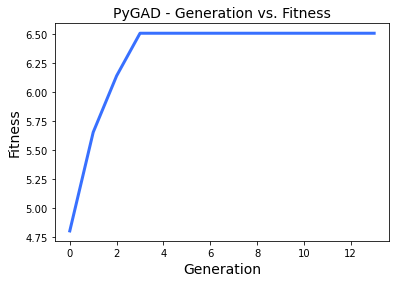

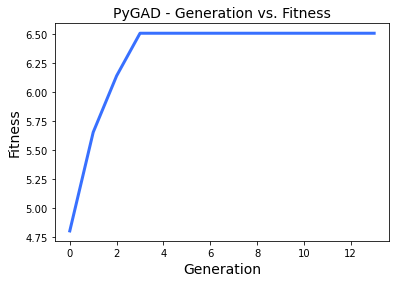

In [119]:
instancia1.plot_fitness()

In [120]:
evaluarSolucion(solution)

La carga evaluada tiene:
	64.71% de utilidad por las materias de primeros ciclos llevadas.
	40.0% del total de las materias reprobadas del estudiante.
	100.0% de utilidad por cantidad ideal de materias del estudiante.
	0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	12.5% de costo por el total de amplitud de horario.


In [121]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
4,II0106,1,Cálculo diferencial,Can Tun / Miguel Alberto,-,07:00-09:00,-,-,07:00-09:00
6,IT0161,1,Sistemas operativos POSIX,Báez López / Yarely,11:00-13:00,-,11:00-12:00,-,-
8,DP0396,2,Identidad y cultura,Alavez San Pedro / Minerva,-,09:00-11:00,-,08:00-09:00,-
9,ID0204,2,Bases de Datos,Lara Peraza / Wilberth Eduardo,09:00-11:00,-,09:00-11:00,-,-
10,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
13,ID0265,2,Programación web,Morales Saavedra / Emmanuel,13:00-14:00,-,13:00-15:00,-,-
28,DP0295,2,Taller de formación en responsabilidad social ...,Blanco Valdés / Santiago,-,13:00-15:00,-,13:00-14:00,-


In [122]:
instancia1.best_solution_generation

3

In [123]:
solution_fitness

6.506617647058824

In [124]:
obtenerHorario(solution)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,-,Cálculo diferencial,-,-,Cálculo diferencial
1,8:00-9:00,-,Cálculo diferencial,-,Identidad y cultura,Cálculo diferencial
2,9:00-10:00,Bases de Datos,Identidad y cultura,Bases de Datos,Geometría computacional,-
3,10:00-11:00,Bases de Datos,Identidad y cultura,Bases de Datos,Geometría computacional,Geometría computacional
4,11:00-12:00,Sistemas operativos POSIX,-,Sistemas operativos POSIX,-,-
5,12:00-13:00,Sistemas operativos POSIX,-,-,-,-
6,13:00-14:00,Programación web,Taller de formación en responsabilidad social ...,Programación web,Taller de formación en responsabilidad social ...,-
7,14:00-15:00,-,Taller de formación en responsabilidad social ...,Programación web,-,-
8,15:00-16:00,-,-,-,-,-


In [67]:
asdfasdf

NameError: name 'asdfasdf' is not defined

**Resultado:** El algoritmo me recomendó un horario "mejor" debido a que toma todas las materias recomendadas del ciclo correspondiente y en un mismo turno. Sin embargo tiene la ventaja de llevar más materias lo que permite adelantar con los créditos para la licenciatura.

## Dylan

### Prueba 1

In [ ]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [ ]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Martes": [False,False,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Miercoles": [False,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [False,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Viernes": [False,True,True,True,True,False,False,False,False,False,False,False,False,False,False]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/CHAN_DYLAN_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [ ]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

In [ ]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

In [ ]:
obtenerDatosCarga(solution,ofertaUtil)

In [ ]:
obtenerHorario(solution)

In [ ]:
evaluarSolucion(solution)

In [ ]:
solution_fitness

In [ ]:
evaluarSolucion([0,1,3,22,13])

In [ ]:
ofertaUtil.loc[[0,1,3,22,13]]

### Prueba 2

In [ ]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 0.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [ ]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Martes": [False,False,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Miercoles": [False,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [False,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Viernes": [False,True,True,True,True,False,False,False,False,False,False,False,False,False,False]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/CHAN_DYLAN_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [ ]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

In [ ]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

In [ ]:
obtenerDatosCarga(solution,ofertaUtil)

In [ ]:
obtenerHorario(solution)

In [ ]:
evaluarSolucion(solution)

In [ ]:
solution_fitness

In [ ]:
evaluarSolucion([0,1,3,22,13])

In [ ]:
obtenerDesempeno([0,1,3,22,13],0)

In [ ]:
ofertaUtil.loc[[0,1,3,22,13]]

In [ ]:
obtenerHorario([0,1,3,22,13])

**Resultados:** Las materias son pocas por el horario de disponibilidad especificado, sin embargo al disminuir su peso la cantidad de materias aumenta así como el desempeño de la carga.

## Jasmin

In [ ]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [ ]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Martes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Miercoles": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Jueves": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Viernes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/CANDANEDO_JASMIN_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [ ]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

In [ ]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

### Resultados

In [ ]:
obtenerDatosCarga(solution,ofertaUtil)

In [ ]:
obtenerHorario(solution)

In [ ]:
evaluarSolucion(solution)

In [ ]:
solution_fitness

### Resultados ideales

In [ ]:
obtenerDesempeno([ 4, 20, 22,  8,  9, 23, 16, 11, 18],0)

In [ ]:
solucionIdeal = [0,13,11,17,18,21,22,20,23]

In [ ]:
obtenerDatosCarga(solucionIdeal,ofertaUtil)

In [ ]:
evaluarSolucion(solucionIdeal)

In [ ]:
obtenerDesempeno(solucionIdeal,0)

In [ ]:
obtenerHorario(solucionIdeal)

**Resultados:** La diferencia principal entre la elección del estudiante y la carga recomendada es la concentración de las materias en un solo horario. Una materia de preespecialidad hace falta pero se puede susituir fácilmente y tendría el mismo desempeño

## Valeria

In [ ]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [ ]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Martes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Miercoles": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Jueves": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Viernes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/GUZMAN_VALERIA_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [ ]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

In [ ]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

### Resultados

In [ ]:
obtenerDatosCarga(solution,ofertaUtil)

In [ ]:
obtenerHorario(solution)

In [ ]:
evaluarSolucion(solution)

In [ ]:
solution_fitness

### Resultados ideales

In [ ]:
obtenerDesempeno([ 4, 20, 22,  8,  9, 23, 16, 11, 18],0)

In [ ]:
solucionIdeal = [0,13,11,17,18,21,22,20,23]

In [ ]:
obtenerDatosCarga(solucionIdeal,ofertaUtil)

In [ ]:
evaluarSolucion(solucionIdeal)

In [ ]:
obtenerDesempeno(solucionIdeal,0)

In [ ]:
obtenerHorario(solucionIdeal)

**Resultados:** La diferencia principal entre la elección del estudiante y la carga recomendada es la concentración de las materias en un solo horario. Una materia de preespecialidad hace falta pero se puede susituir fácilmente y tendría el mismo desempeño

## Prueba

In [ ]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2,  #Costo por disponibilidad de horario
    "cpah": 1.5,  #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

disponibilidadComoRestriccion = False
disponibilidad = disponibilidadArr[4] #Disponibilidad completa de horario
plan = plan_2016

kardex = obtenerKardex()
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [ ]:
verKardex()

In [ ]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

In [ ]:
ofertaUtil.sort_values('ciclos')

In [ ]:
instancia1 = pg.GA(num_generations=50,
                   stop_criteria="saturate_10",
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

In [ ]:
instancia1.plot_fitness()

In [ ]:
solution_fitness

In [ ]:
evaluarSolucion(solution)

In [ ]:
obtenerDatosCarga(solution,ofertaUtil)

In [ ]:
obtenerHorario(solution)